In [2]:
# Author: Xiuxia Du

In [2]:
import os
import sys

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [3]:
# Get the absolute path of the current file
try:
    # Works in .py scripts
    current_dir = os.path.dirname(os.path.abspath(__file__))
except NameError:
    # Fallback for Jupyter
    current_dir = os.getcwd()

# Go up N levels (here N=2, but you can adjust)
project_root = os.path.abspath(os.path.join(current_dir, "..", '..'))

# Add the project root to sys.path if not already there so that the ML_toolbox can be imported
if project_root not in sys.path:
    sys.path.insert(0, project_root)

In [4]:
from ML_toolbox.d_PCA import MyPCA

In [5]:
# plotting parameters
face_color = 'ivory'
marker_size = 9
plt.rcParams['axes.facecolor'] = face_color
fig_size = (5, 3)

In [8]:
# PCA parameters
use_corr = False

# PCA on simulated correlated data, two variables

In [6]:
# create data
x1 = np.arange(start=0, stop=20, step=0.1)
num_of_samples = len(x1)

In [10]:
standard_deviation = [0.5, 4.0]

In [1]:
for i in range(len(standard_deviation)):
    cur_scale = standard_deviation[i]

    # 1. generate the raw data
    x2 = 2 * x1 + np.random.normal(loc=0, scale=cur_scale, size=num_of_samples)

    # 2. visualize the raw data
    fig = plt.figure(figsize=fig_size)
    ax = fig.add_subplot(1, 1, 1)
    ax.scatter(x1, x2, color='blue', s=marker_size)
    ax.set_xlabel('x1')
    ax.set_ylabel('x2')
    ax.set_aspect('equal', 'box')
    ax.set_title('raw data for PCA')

    # 3. do PCA
    dataForAnalysis = np.column_stack((x1, x2))

    num_of_components = min(dataForAnalysis.shape[0], dataForAnalysis.shape[1])

    object_pca = MyPCA(num_of_components=num_of_components)
    pca_results = object_pca.fit_transform(x=dataForAnalysis, corr_logic=use_corr)

    # scree plot
    fig, ax = plt.subplots(figsize=fig_size)
    ax.scatter(range(len(pca_results['percent_variance_explained'])), pca_results['percent_variance_explained'], color='blue', s=marker_size)
    ax.set_title('scree plot')
    ax.set_xlabel('PC index')
    ax.set_ylabel('percent variance explained')
    ax.set_ylim((-10.0, 110.0))

    # scores plot
    fig, ax = plt.subplots(figsize=fig_size)
    ax.scatter(pca_results['scores'][:, 0], pca_results['scores'][:, 1], color='blue', s=marker_size)
    ax.set_title('scores plot')
    ax.set_xlabel('PC1')
    ax.set_ylabel('PC2')

    fig, ax = plt.subplots(figsize=fig_size)
    ax.scatter(pca_results['scores'][:, 0], pca_results['scores'][:, 1], color='blue', s=marker_size)
    ax.set_title('scores plot')
    ax.set_xlabel('PC1')
    ax.set_ylabel('PC2')
    ax.set_ylim((2*min(pca_results['scores'][:, 1]), max(x2)))

    # loadings plot
    fig, ax = plt.subplots(figsize=fig_size)
    ax.scatter(pca_results['loadings'][:, 0], pca_results['loadings'][:, 1], color='blue', s=marker_size)
    ax.set_title('loadings plot')
    ax.set_xlabel('PC1')
    ax.set_ylabel('PC2')
    for i in range(pca_results['loadings'].shape[0]):
        ax.text(pca_results['loadings'][i, 0], pca_results['loadings'][i, 1], 'x'+str(i+1))

    # PCA in the context of the raw data
    k = -20
    fig, ax = plt.subplots(figsize=fig_size)
    ax.scatter(x1, x2, color='blue', s=marker_size)
    ax.plot([0, k*pca_results['loadings'][0, 0]], [0, k*pca_results['loadings'][1, 0]],
            color='red', linewidth=3, label='PC 1')
    ax.plot([0, (-k) * pca_results['loadings'][0, 1]], [0, (-k) * pca_results['loadings'][1, 1]],
            color='green', linewidth=3, label='PC 2')
    ax.set_title('raw data and PC axis')
    ax.set_aspect('equal', 'box')
    ax.set_xlabel('x1')
    ax.set_ylabel('x2')
    ax.legend()

    # keep only the first dimension
    data_reconstructed = np.matmul(pca_results['scores'][:, 0].reshape((200, 1)), pca_results['loadings'][:, 0].reshape((1, 2)))
    fig = plt.figure(figsize=fig_size)
    ax = fig.add_subplot(1, 1, 1)
    ax.set_title('reconstructed data using PC1')
    ax.scatter(data_reconstructed[:, 0], data_reconstructed[:, 1], color='blue', s=marker_size)
    ax.set_xlabel('x1')
    ax.set_ylabel('x2')

NameError: name 'standard_deviation' is not defined

# PCA on completely random data, two variables


NameError: name 'use_corr' is not defined

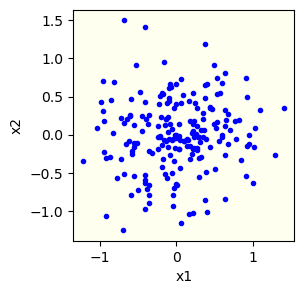

In [7]:
# 1. generate raw data
x1 = np.random.normal(loc=0, scale=0.5, size=num_of_samples)
x2 = np.random.normal(loc=0, scale=0.5, size=num_of_samples)

# 2. visualize the raw data
fig, ax = plt.subplots(figsize=fig_size)
ax.scatter(x1, x2, color='blue', s=marker_size)
ax.set_aspect('equal', 'box')
ax.set_xlabel('x1')
ax.set_ylabel('x2')

# 3. do PCA
data_for_analysis = np.column_stack((x1, x2))

object_pca = MyPCA(num_of_components=min(data_for_analysis.shape[0], data_for_analysis.shape[1]))
pca_results = object_pca.fit_transform(x=data_for_analysis, corr_logic=use_corr)

# scree plot
fig, ax = plt.subplots(figsize=fig_size)
ax.set_title('scree plot')
ax.scatter(range(len(pca_results['percent_variance_explained'])), pca_results['percent_variance_explained'], color='blue', s=marker_size)
ax.set_ylim((-10.0, 110.0))
ax.set_xlabel('PC index')
ax.set_ylabel('percent variance')

# scores plot
fig, ax = plt.subplots(figsize=fig_size)
ax.set_title('scores plot')
ax.scatter(pca_results['scores'][:, 0], pca_results['scores'][:, 1], color='blue', s=marker_size)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')

# loadings plot
fig = plt.figure(figsize=fig_size)
ax = fig.add_subplot(1,1,1)
ax.set_title('loadings plot')
ax.scatter(pca_results['loadings'][:, 0], pca_results['loadings'][:, 1], color='blue', s=marker_size)
for i in range(pca_results['loadings'].shape[0]):
    ax.text(pca_results['loadings'][i, 0], pca_results['loadings'][i, 1], 'x' + str(i + 1))
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')

# PCA in the context of the raw data
fig = plt.figure(figsize=fig_size)
ax = fig.add_subplot(1,1,1)
ax.set_title('raw data and PC axis')
ax.scatter(x1, x2, color='blue', s=marker_size)
k=3
ax.plot([0, (-1)*k*pca_results['loadings'][0,0]], [0, (-1)*k*pca_results['loadings'][1,0]],
    color='red', linewidth=3)
ax.plot([0, k * pca_results['loadings'][0, 1]], [0, k * pca_results['loadings'][1, 1]],
    color='red',linewidth=3)
ax.set_aspect('equal', 'box')

# PCA on correlated and random data, three variables

In [8]:
# 1. get the raw data
# in_file_name = "../data/dataset_1.csv"
in_file_name = '../../data/toy_data_for_pca.csv'
data_in_df = pd.read_csv(in_file_name)
data_in_df.head()

,x1,x2,x3
0,0.084,0.803,0.524
1,0.311,1.644,0.532
2,0.549,2.553,0.062
3,0.249,1.584,0.321
4,0.366,1.646,0.393


Text(0, 0.5, 'x3')

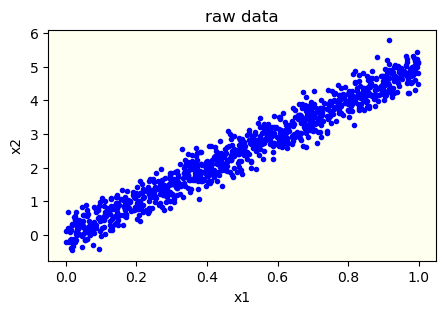

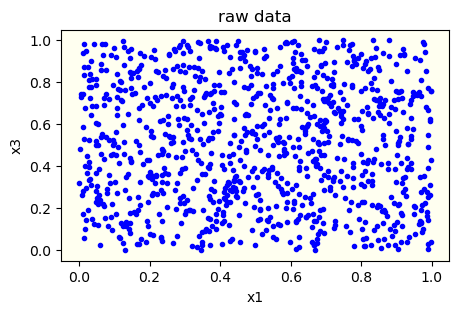

In [9]:
# 2. visualize the raw data: x vs y
fig = plt.figure(figsize=fig_size)
ax = fig.add_subplot(1, 1, 1)
ax.set_title("raw data")
ax.scatter(data_in_df['x1'], data_in_df['x2'], color='blue', s=marker_size)
ax.set_xlabel('x1')
ax.set_ylabel('x2')

# x vs z
fig = plt.figure(figsize=fig_size)
ax = fig.add_subplot(1, 1, 1)
ax.set_title("raw data")
ax.scatter(data_in_df['x1'], data_in_df['x3'], color='blue', s=marker_size)
ax.set_xlabel('x1')
ax.set_ylabel('x3')

In [11]:
# 3. do PCA
data_for_analysis = data_in_df.to_numpy()

object_pca = MyPCA(num_of_components=min(data_for_analysis.shape[0], data_for_analysis.shape[1]))
pca_results = object_pca.fit_transform(x=data_for_analysis, corr_logic=use_corr)

# scree plot
fig, ax = plt.subplots(figsize=fig_size)
ax.set_title('scree plot')
ax.scatter(range(len(pca_results['percent_variance_explained'])), pca_results['percent_variance_explained'], color='blue', s=marker_size)
ax.set_xlabel('PC index')
ax.set_ylabel('percent variance explained')
ax.set_ylim((-10.0, 110.0))

# scores plot
fig, ax = plt.subplots(figsize=fig_size)
ax.set_title('scores plot')
ax.scatter(pca_results['scores'][:, 0], pca_results['scores'][:, 1], color='blue', s=marker_size)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')

# loadings plot
fig, ax = plt.subplots(figsize=fig_size)
ax.set_title('loadings plot')
ax.scatter(pca_results['loadings'][:, 0], pca_results['loadings'][:, 1], color='blue', s=marker_size)
for i in range(pca_results['loadings'].shape[0]):
    ax.text(pca_results['loadings'][i, 0], pca_results['loadings'][i, 1], 'x' + str(i + 1))
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')

NameError: name 'use_corr' is not defined

# PCA on real data

In [12]:
# import data
in_file_name = '../../data/SCLC_study_output_filtered_2.csv'
data_in_df = pd.read_csv(in_file_name, header=0, index_col=0)
data_in_df

,295,464,961,1000,1076,1078,1150,1153,1162,1256,1259,1262,1276,1283,1365,1381,1387,1414,1553
NSCLC_A549_1,1.246687e+06,59929.70461,205990.10240,141932.67280,1.581945e+06,8.887623e+05,2.010902e+06,646161.3985,308624.5720,1.226676e+06,432775.51610,1682597.289,616102.1974,90521.64522,5.872333e+05,1.664931e+06,624615.6967,6.454732e+05,6.867305e+05
NSCLC_H1703_2,1.338013e+06,89261.66256,245504.46460,153877.95640,1.540255e+06,6.926569e+05,1.551695e+06,516276.2156,405340.4733,1.604223e+06,576127.40460,1399125.584,508743.2592,65972.45613,9.888830e+05,2.281045e+06,860709.5233,2.935047e+05,9.408252e+05
NSCLC_H1703_1,1.040438e+06,96002.36973,321302.76350,184414.18630,1.638340e+06,7.405865e+05,1.437951e+06,482798.7760,389654.6384,1.555351e+06,555434.08260,1378829.209,497591.3750,68732.01593,1.002957e+06,2.026722e+06,765475.8487,3.138116e+05,1.086556e+06
NSCLC_A549_2,1.371136e+06,81436.65785,299820.73530,261578.57320,1.730888e+06,1.144259e+06,2.272555e+06,773292.3518,362162.4799,1.359538e+06,495468.09170,1821494.948,635561.3457,89888.93269,6.085336e+05,1.732424e+06,649737.5435,7.626001e+05,8.461167e+05
NSCLC_H1437_1,1.107106e+06,92368.82235,225084.58300,149658.91170,1.149976e+06,1.306578e+06,2.386938e+06,802728.3053,345864.8827,1.044867e+06,377669.11860,1617663.099,568534.8039,84579.99092,2.421161e+05,1.419140e+06,531985.3086,4.596129e+05,4.022300e+05
NSCLC_H2228_1,1.174738e+06,79716.72953,156993.44400,90737.41356,1.962268e+06,1.775059e+05,1.397164e+06,463010.9798,306187.7022,9.612306e+05,335751.13610,1615823.141,582776.9029,76509.16145,3.640589e+05,1.712050e+06,637511.1714,8.225157e+05,3.243276e+05
NSCLC_H2228_2,1.202537e+06,78543.10781,177756.90200,93190.85907,1.978721e+06,2.587312e+05,1.435649e+06,469439.0543,249398.5049,9.176721e+05,323971.29260,1305062.953,477014.5509,63940.66034,3.701066e+05,1.514599e+06,552987.1619,8.019036e+05,4.109319e+05
NSCLC_H1437_2,1.227508e+06,85554.76639,176479.96710,133280.40000,1.109062e+06,1.361577e+06,2.264754e+06,769480.9346,365340.2576,9.842821e+05,350714.38730,1520010.939,529926.0027,76496.48792,2.268289e+05,1.282983e+06,488741.6452,4.746453e+05,4.377822e+05
NSCLC_H3122_1,8.970122e+05,58148.61391,75601.49088,85941.99274,9.357340e+05,1.572857e+06,1.853504e+06,637659.3331,142501.3571,1.011283e+06,352198.60110,1242783.069,430968.1967,57893.83272,2.135067e+05,1.049992e+06,395307.4620,2.742129e+05,3.356711e+05
NSCLC_H322_2,9.764488e+05,89009.23679,238764.68520,142421.06880,1.417050e+06,6.379252e+05,1.475071e+06,498342.7043,176472.3668,1.076573e+06,386343.29180,1455222.442,522777.7485,72640.37138,4.792914e+05,1.354471e+06,499691.8594,6.329151e+05,2.581493e+05


In [13]:
data_for_analysis = data_in_df.to_numpy()

# do PCA
object_pca = MyPCA(num_of_components=min(data_for_analysis.shape[0], data_for_analysis.shape[1]))
pca_results = object_pca.fit_transform(x=data_for_analysis, corr_logic=use_corr)

# scree plot
fig, ax = plt.subplots(figsize=fig_size)
ax.set_title('scree plot')
ax.scatter(range(len(pca_results['percent_variance_explained'])), pca_results['percent_variance_explained'], color='blue', s=marker_size)
ax.set_xlabel('PC index')
ax.set_ylabel('percent variance explained')
ax.set_ylim((-10.0, 110.0))

# scores plot
fig, ax = plt.subplots(figsize=fig_size)
ax.set_title('scores plot')
ax.scatter(pca_results['scores'][:, 0], pca_results['scores'][:, 1], color='blue', s=marker_size)
ax.scatter(pca_results['scores'][0:20, 0], pca_results['scores'][0:20, 1], color='red', s=marker_size)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')

# loadings plot
fig, ax = plt.subplots(figsize=fig_size)
ax.set_title('loadings plot')
ax.scatter(pca_results['loadings'][:, 0], pca_results['loadings'][:, 1], color='blue', s=marker_size)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')

NameError: name 'use_corr' is not defined

# Use sklearn on real data

In [14]:
in_file_name = '../../data/SCLC_study_output_filtered_2.csv'
data_in_df = pd.read_csv(in_file_name, header=0, index_col=0)
data_in_df.head()

,295,464,961,1000,1076,1078,1150,1153,1162,1256,1259,1262,1276,1283,1365,1381,1387,1414,1553
NSCLC_A549_1,1246686.524,59929.70461,205990.1024,141932.6728,1581944.950,8.887623e+05,2010901.874,646161.3985,308624.5720,1226676.022,432775.5161,1682597.289,616102.1974,90521.64522,5.872333e+05,1664931.401,624615.6967,645473.1920,6.867305e+05
NSCLC_H1703_2,1338013.461,89261.66256,245504.4646,153877.9564,1540255.324,6.926569e+05,1551694.853,516276.2156,405340.4733,1604223.193,576127.4046,1399125.584,508743.2592,65972.45613,9.888830e+05,2281045.486,860709.5233,293504.7109,9.408252e+05
NSCLC_H1703_1,1040438.105,96002.36973,321302.7635,184414.1863,1638339.884,7.405865e+05,1437951.238,482798.7760,389654.6384,1555350.658,555434.0826,1378829.209,497591.3750,68732.01593,1.002957e+06,2026722.484,765475.8487,313811.6234,1.086556e+06
NSCLC_A549_2,1371135.588,81436.65785,299820.7353,261578.5732,1730887.909,1.144259e+06,2272554.651,773292.3518,362162.4799,1359538.194,495468.0917,1821494.948,635561.3457,89888.93269,6.085336e+05,1732423.877,649737.5435,762600.1361,8.461167e+05
NSCLC_H1437_1,1107105.986,92368.82235,225084.5830,149658.9117,1149976.279,1.306578e+06,2386937.600,802728.3053,345864.8827,1044867.464,377669.1186,1617663.099,568534.8039,84579.99092,2.421161e+05,1419139.504,531985.3086,459612.8875,4.022300e+05


In [15]:
num_of_samples = data_in_df.shape[0]
num_of_variables = data_in_df.shape[1]
sample_names = data_in_df.index.values
variable_names = data_in_df.columns.values

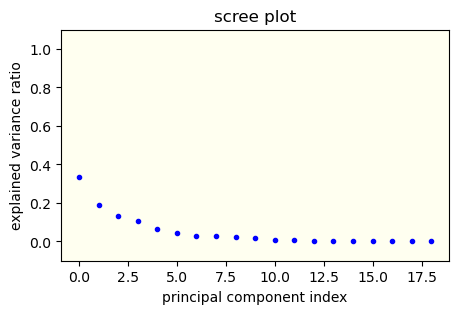

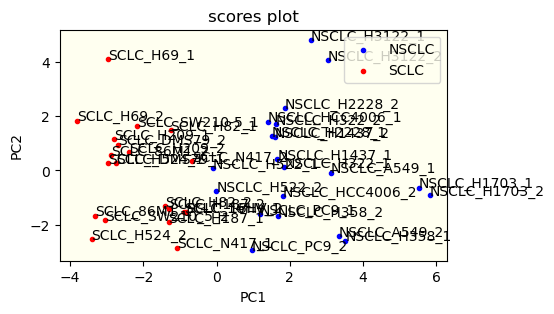

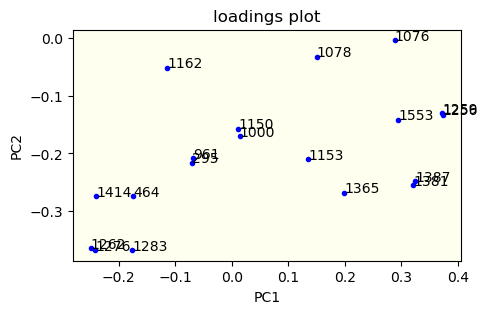

In [16]:
# data pre-processing
# standardize each variable by computing its z-score
data_for_analysis_standardized = StandardScaler(with_mean=True, with_std=True).fit_transform(data_in_df)

num_of_components = min(num_of_samples, num_of_variables)

object_PCA = PCA(n_components=num_of_components)

PCA_fit_results = object_PCA.fit(data_for_analysis_standardized)

# scree plot
fig, ax = plt.subplots(figsize=fig_size)
ax.scatter(range(len(PCA_fit_results.explained_variance_ratio_)),
           PCA_fit_results.explained_variance_ratio_,
           color='blue', s=marker_size)
ax.set_ylim([-0.1, 1.1])
ax.set_xlabel("principal component index")
ax.set_ylabel("explained variance ratio")
ax.set_title("scree plot")

PCA_scores = object_PCA.fit_transform(data_for_analysis_standardized)

# scores plot
fig = plt.figure(figsize=fig_size)
ax = fig.add_subplot(1, 1, 1)
ax.scatter(PCA_scores[0:20, 0], PCA_scores[0:20, 1], color='blue', label='NSCLC', s=marker_size)
ax.scatter(PCA_scores[20:40, 0], PCA_scores[20:40, 1], color='red', label='SCLC', s=marker_size)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_title('scores plot')

for i in range(PCA_scores.shape[0]):
    ax.text(PCA_scores[i, 0], PCA_scores[i, 1], sample_names[i])
ax.legend()

# loadings plot
fig = plt.figure(figsize=fig_size)
ax = fig.add_subplot(1, 1, 1)
ax.scatter(PCA_fit_results.components_[0, :], PCA_fit_results.components_[1, :],
           color='blue', s=marker_size)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_title('loadings plot')

for i in range(num_of_variables):
    ax.text(PCA_fit_results.components_[0, i], PCA_fit_results.components_[1, i], variable_names[i])